<a href="https://colab.research.google.com/github/zcohen949/Astron-1221/blob/main/Week8_HubbleConstantForSupernovae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np # imports the numpy package which allows us to conduct mathematical operations for the defined quantities
import matplotlib.pyplot as plt # imports a plotting package

In [59]:
import astropy.io.ascii # imports the astropy ascii package
import astropy.units as u # imports the astropy units package
import astropy.constants as ac # imports the astropy constants package

In [4]:
from google.colab import files # imports the files package from google.colab
uploaded = files.upload() # uploads a data file to be used

Saving Tonry_2003.vot to Tonry_2003.vot


In [5]:
dat = astropy.io.ascii.read("Tonry_2003.vot") # reads the imported data file and names it dat

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

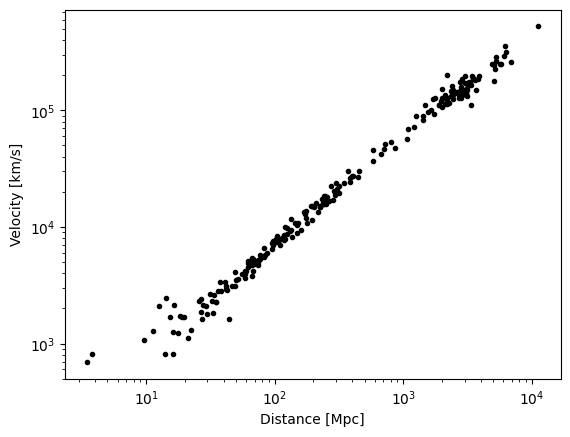

In [6]:
distance = 10**dat["col8"] / 72.0 * u.mpc # calculates distance in mpc of column 8 from data
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc # calculates distance error of columns 8 and 9 from data
velocity = 10**dat["col7"] * u.km / u.s # calculates velocity in km/s of column 7 from data
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none") # plots the data (velocity and distance), while stylizing the plot
plt.xlim(0, 9000) # sets an upper limit to the x axis
plt.ylim(0, 400000) # sets an upper limit to the y axis
plt.xscale("log") # sets the x axis to a logarithmic scale
plt.yscale("log") # sets the y axis to a logarithmic scale
plt.xlabel("Distance [Mpc]") # labels the x axis
plt.ylabel("Velocity [km/s]") # labels the y axis

Text(0, 0.5, 'Velocity [km/s]')

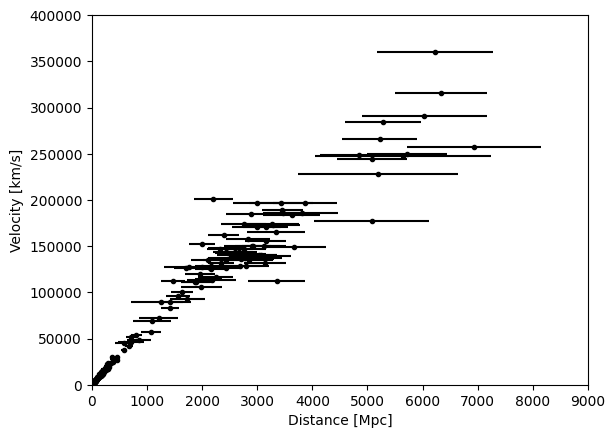

In [15]:
distance = 10**dat["col8"] / 72.0 * u.mpc # calculates distance in mpc of column 8 from data
velocity = 10**dat["col7"] * u.km / u.s # calculates velocity in km/s of column 7 from data
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none") # plots data with an error bar, while stylizing the plot
plt.xlim(0, 9000) # sets an upper limit to the x axis
plt.ylim(0, 400000) # sets an upper limit to the y axis
plt.xlabel("Distance [Mpc]") # labels the x axis
plt.ylabel("Velocity [km/s]") # labels the y axis

In [16]:
x = distance.to(u.mpc).value # sets a variable x equal to the distance at a value
ind = np.where((x > 0) & (x < 9000)) # indexes x between 0 and 9000
z = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1)# creates a line from the distance and velocity indexes

In [9]:
p = np.poly1d(z) # creates a polynomial from the line created

In [10]:
velocity_model = p(distance.to(u.mpc).value) # creates a model for the velocity

48.84340628542435 km / (Mpc s)


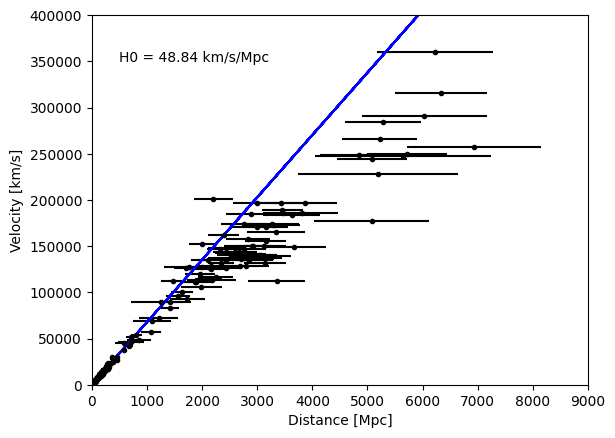

In [42]:
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none") # plots a stylized error bar
plt.plot(distance.to(u.mpc).value, velocity_model, color="blue") # plots the line
plt.xlim(0, 9000) # sets an upper and lower limit to the x axis
plt.ylim(0, 400000) # sets an upper and lower limit to the y axis
plt.xlabel("Distance [Mpc]") # labels the x axis
plt.ylabel("Velocity [km/s]") # labels the y axis
plt.annotate(r"H0 = {0:5.2f} km/s/Mpc".format(z[0]), xy=(500, 350000)) # creates an annotation which puts the value of the Hubble's constant on the graph at a point
HubbleConstant = z[0] # creates a variable for the Hubble constant
HubbleConstant = HubbleConstant  * u.km / u.s / u.Mpc # gives units to the Hubble Constant
print(HubbleConstant) # prints the Hubble Constant

In [43]:
AgeOfUniverse = (1/HubbleConstant).to(u.Gyr) # Calculates the age of the universe from the Hubble constant and converts to billion years
print(AgeOfUniverse) # prints this value

20.01891956443214 Gyr


In [52]:
C_linear = z[0] * distance.to(u.mpc).value + z[1] # creates a linear scale from our data

In [58]:
n = len(velocity_model)  # creates a variable for the number of data points from the velocity model
m = 2  # the number of dimensions or axes
re_chi = np.sum(((velocity_model - C_linear)**2) / ((distance_error.to(u.mpc).value)**2)) / (n - m) # calculates the reduced chi squared value from our grpah
print("Reduced Chi for linear fit = {:.2f}".format(re_chi)) # prints this value

Reduced Chi for linear fit = 5139369.92
